In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from pathlib import Path
from scipy.stats import pearsonr
import numpy as np

In [3]:
file_1 = Path('Resources/Criminality_Index_2021.csv')
file_2 = Path('Resources/Criminality_Index_2023.csv')

In [5]:
crime_index_2021 = pd.read_csv(file_1)
crime_index_2021.head(10)

,Continent,Region,Country,Criminality,Criminal markets,Human trafficking,Human smuggling,Arms trafficking,Flora crimes,Fauna crimes,...,International cooperation,National policies and laws,Judicial system and detention,Law enforcement,Territorial integrity,Anti-money laundering,Economic regulatory capacity,Victim and witness support,Prevention,Non-state actors
0,Asia,Western Asia,Turkey,6.89,6.40,7.0,9.0,9.0,4.0,3.0,...,3.5,4.5,2.0,3.0,6.5,2.0,4.0,4.0,3.5,3.5
1,Africa,West Africa,Cabo Verde,4.04,3.70,4.5,2.0,2.5,2.5,4.0,...,8.5,7.0,7.0,6.0,7.5,5.0,6.0,3.5,6.0,7.0
2,Africa,Southern Africa,South Africa,6.63,6.00,4.5,4.0,8.0,3.5,7.5,...,6.5,6.5,6.0,5.0,6.0,6.0,6.0,4.0,5.0,7.0
3,Americas,South America,Colombia,7.66,7.20,7.5,7.0,8.0,6.0,7.0,...,9.0,7.0,5.5,6.0,4.5,6.0,5.0,3.5,4.5,6.5
4,Americas,South America,Peru,6.35,6.20,7.0,6.0,5.5,7.0,5.5,...,5.0,6.0,6.0,5.0,5.0,4.5,4.0,3.5,3.0,4.5
5,Asia,Western Asia,Iraq,7.05,6.35,8.0,8.5,9.0,1.5,4.5,...,4.0,4.0,4.0,3.5,3.5,4.0,3.5,3.0,4.0,4.5
6,Americas,South America,Suriname,4.90,4.55,4.0,4.0,5.5,5.0,3.5,...,3.0,2.0,2.0,2.0,2.0,1.0,1.5,2.0,2.5,4.0
7,Americas,South America,Venezuela,6.64,5.65,7.5,7.5,8.0,2.5,2.5,...,1.5,2.0,1.5,1.5,3.5,1.5,1.0,1.0,2.0,4.0
8,Africa,Southern Africa,Mauritius,4.51,4.40,4.5,3.5,2.0,2.0,3.0,...,6.5,6.0,5.5,5.5,5.5,3.5,7.0,5.5,5.0,6.0
9,Africa,Southern Africa,Botswana,3.71,3.80,4.5,3.0,3.0,2.0,7.5,...,8.0,6.0,6.5,5.0,5.0,4.5,5.5,5.5,4.5,6.0


In [7]:
crime_index_2023 = pd.read_csv(file_2)
crime_index_2023.head()

,Continent,Region,Country,"Criminality avg,","Criminal markets avg,",Human trafficking,Human smuggling,Arms trafficking,Flora crimes,Fauna crimes,...,International cooperation,National policies and laws,Judicial system and detention,Law enforcement,Territorial integrity,Anti-money laundering,Economic regulatory capacity,Victim and witness support,Prevention,Non-state actors
0,Asia,Southern Asia,Afghanistan,7.10,7.00,9.0,9.5,9.0,5.5,3.5,...,1.0,1.5,1.5,1.5,3.5,1.0,1.5,1.5,1.5,1.0
1,Africa,North Africa,Libya,6.93,6.57,8.5,9.5,9.0,1.0,3.5,...,2.5,2.0,1.5,1.5,1.5,1.0,2.0,1.0,1.0,1.5
2,Asia,South-Eastern Asia,Myanmar,8.15,7.70,8.5,8.0,9.0,8.5,8.5,...,2.0,2.0,1.5,1.5,2.0,2.0,1.5,1.0,1.5,1.5
3,Asia,Western Asia,Yemen,6.57,5.63,9.0,9.0,9.5,2.5,4.0,...,3.0,2.0,1.5,2.0,1.5,2.0,2.0,1.0,1.0,2.0
4,Africa,Central Africa,Central African Republic,6.75,5.60,7.5,5.5,9.0,7.0,8.0,...,3.0,2.0,2.0,1.5,1.5,2.0,1.5,2.5,1.0,1.5


In [9]:
#Chossing the columns that will be used the data analysis
selected_columns_indices = [0,2,3,20]
new_crime_index_2021_df = crime_index_2021.iloc[:, selected_columns_indices]

In [11]:
new_crime_index_2021_df.head()

,Continent,Country,Criminality,Resilience
0,Asia,Turkey,6.89,3.54
1,Africa,Cabo Verde,4.04,6.33
2,Africa,South Africa,6.63,5.79
3,Americas,Colombia,7.66,5.83
4,Americas,Peru,6.35,4.58


In [13]:
#Changing necessary names so that the dataframes match and can be merged
new_crime_index_2021_df = new_crime_index_2021_df.rename(columns={'Criminality':'Criminality avg,', 'Resilience':'Resilience avg,', 'Country':'Country name'})
new_crime_index_2021_df

,Continent,Country name,"Criminality avg,","Resilience avg,"
0,Asia,Turkey,6.89,3.54
1,Africa,Cabo Verde,4.04,6.33
2,Africa,South Africa,6.63,5.79
3,Americas,Colombia,7.66,5.83
4,Americas,Peru,6.35,4.58
...,...,...,...,...
188,Americas,Jamaica,5.91,5.46
189,Americas,St. Vincent and the Grenadines,3.30,5.46
190,Europe,Slovenia,4.29,6.08
191,Americas,St. Lucia,4.09,5.63


In [15]:
selected_columns_indices = [0,2,3,26]
new_crime_index_2023_df = crime_index_2023.iloc[:, selected_columns_indices]
new_crime_index_2023_df = new_crime_index_2023_df.rename(columns={'Country':'Country name'})
new_crime_index_2023_df

,Continent,Country name,"Criminality avg,","Resilience avg,"
0,Asia,Afghanistan,7.10,1.50
1,Africa,Libya,6.93,1.54
2,Asia,Myanmar,8.15,1.63
3,Asia,Yemen,6.57,1.75
4,Africa,Central African Republic,6.75,1.79
...,...,...,...,...
188,Asia,"Korea, Rep,",4.43,8.08
189,Europe,Denmark,4.02,8.13
190,Europe,Iceland,3.37,8.21
191,Europe,Liechtenstein,2.27,8.46


In [17]:
file_3 = Path("Resources/WHR2021.csv")
file_4 = Path("Resources/WHR2023.csv")

In [19]:
whr_2021 = pd.read_csv(file_3)
whr_2021

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


In [21]:
whr_2023 = pd.read_csv(file_4)
whr_2023

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.804,0.036,7.875,7.733,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363
1,Denmark,7.586,0.041,7.667,7.506,10.962,0.954,71.250,0.934,0.134,0.196,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084
2,Iceland,7.530,0.049,7.625,7.434,10.896,0.983,72.050,0.936,0.211,0.668,1.778,1.926,1.620,0.559,0.738,0.250,0.187,2.250
3,Israel,7.473,0.032,7.535,7.411,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,1.833,1.521,0.577,0.569,0.124,0.158,2.691
4,Netherlands,7.403,0.029,7.460,7.346,10.942,0.930,71.550,0.887,0.213,0.379,1.778,1.942,1.488,0.545,0.672,0.251,0.394,2.110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),3.207,0.095,3.394,3.020,7.007,0.652,55.375,0.664,0.086,0.834,1.778,0.531,0.784,0.105,0.375,0.183,0.068,1.162
133,Zimbabwe,3.204,0.061,3.323,3.084,7.641,0.690,54.050,0.654,-0.046,0.766,1.778,0.758,0.881,0.069,0.363,0.112,0.117,0.905
134,Sierra Leone,3.138,0.082,3.299,2.976,7.394,0.555,54.900,0.660,0.105,0.858,1.778,0.670,0.540,0.092,0.371,0.193,0.051,1.221
135,Lebanon,2.392,0.044,2.479,2.305,9.478,0.530,66.149,0.474,-0.141,0.891,1.778,1.417,0.476,0.398,0.123,0.061,0.027,-0.110


In [23]:
selected_column_indices_2 = [0,2]
whr_2021_df = whr_2021.iloc[:, selected_column_indices_2]
whr_2021_df

,Country name,Ladder score
0,Finland,7.842
1,Denmark,7.620
2,Switzerland,7.571
3,Iceland,7.554
4,Netherlands,7.464
...,...,...
144,Lesotho,3.512
145,Botswana,3.467
146,Rwanda,3.415
147,Zimbabwe,3.145


In [25]:
selected_column_indices_3 = [0,1]
whr_2023_df = whr_2023.iloc[:, selected_column_indices_3]
whr_2023_df

,Country name,Ladder score
0,Finland,7.804
1,Denmark,7.586
2,Iceland,7.530
3,Israel,7.473
4,Netherlands,7.403
...,...,...
132,Congo (Kinshasa),3.207
133,Zimbabwe,3.204
134,Sierra Leone,3.138
135,Lebanon,2.392


In [27]:
#Merge of the dataframe for the analysis of the year 2021
happy_crime_df_2021 = pd.merge(new_crime_index_2021_df, whr_2021_df, how='left', on='Country name')
happy_crime_df_2021['Year'] = 2021
happy_crime_df_2021

,Continent,Country name,"Criminality avg,","Resilience avg,",Ladder score,Year
0,Asia,Turkey,6.89,3.54,4.948,2021
1,Africa,Cabo Verde,4.04,6.33,NaN,2021
2,Africa,South Africa,6.63,5.79,4.956,2021
3,Americas,Colombia,7.66,5.83,6.012,2021
4,Americas,Peru,6.35,4.58,5.840,2021
...,...,...,...,...,...,...
188,Americas,Jamaica,5.91,5.46,6.309,2021
189,Americas,St. Vincent and the Grenadines,3.30,5.46,NaN,2021
190,Europe,Slovenia,4.29,6.08,6.461,2021
191,Americas,St. Lucia,4.09,5.63,NaN,2021


In [29]:
#Merge dataframe of the year 2023
happy_crime_df_2023 = pd.merge(new_crime_index_2023_df, whr_2023_df, how='left', on='Country name')
happy_crime_df_2023['Year'] = 2023
happy_crime_df_2023

,Continent,Country name,"Criminality avg,","Resilience avg,",Ladder score,Year
0,Asia,Afghanistan,7.10,1.50,1.859,2023
1,Africa,Libya,6.93,1.54,NaN,2023
2,Asia,Myanmar,8.15,1.63,4.372,2023
3,Asia,Yemen,6.57,1.75,NaN,2023
4,Africa,Central African Republic,6.75,1.79,NaN,2023
...,...,...,...,...,...,...
188,Asia,"Korea, Rep,",4.43,8.08,NaN,2023
189,Europe,Denmark,4.02,8.13,7.586,2023
190,Europe,Iceland,3.37,8.21,7.530,2023
191,Europe,Liechtenstein,2.27,8.46,NaN,2023


In [31]:
#Merge of both previous dataframes
happy_crime_all_df = pd.merge(happy_crime_df_2021, happy_crime_df_2023, how= 'inner', on=['Country name', 'Continent'], suffixes=('_2021','_2023'))
happy_crime_all_df

,Continent,Country name,"Criminality avg,_2021","Resilience avg,_2021",Ladder score_2021,Year_2021,"Criminality avg,_2023","Resilience avg,_2023",Ladder score_2023,Year_2023
0,Asia,Turkey,6.89,3.54,4.948,2021,7.03,3.38,NaN,2023
1,Africa,Cabo Verde,4.04,6.33,NaN,2021,4.28,6.58,NaN,2023
2,Africa,South Africa,6.63,5.79,4.956,2021,7.18,5.63,5.275,2023
3,Americas,Colombia,7.66,5.83,6.012,2021,7.75,5.63,5.630,2023
4,Americas,Peru,6.35,4.58,5.840,2021,6.40,4.38,5.526,2023
...,...,...,...,...,...,...,...,...,...,...
181,Americas,Uruguay,2.69,7.75,6.431,2021,3.22,7.50,6.494,2023
182,Africa,Libya,6.55,1.54,5.410,2021,6.93,1.54,NaN,2023
183,Americas,Jamaica,5.91,5.46,6.309,2021,5.80,5.42,5.703,2023
184,Europe,Slovenia,4.29,6.08,6.461,2021,4.37,6.04,6.650,2023


In [33]:
#Cleaning dataframe for null values generated by different values in the country column
happy_crime_all_df['row_has_null'] = happy_crime_all_df.isnull().any(axis=1)
happy_crime_all_df_clean = happy_crime_all_df.dropna()
happy_crime_all_df_clean

,Continent,Country name,"Criminality avg,_2021","Resilience avg,_2021",Ladder score_2021,Year_2021,"Criminality avg,_2023","Resilience avg,_2023",Ladder score_2023,Year_2023,row_has_null
2,Africa,South Africa,6.63,5.79,4.956,2021,7.18,5.63,5.275,2023,False
3,Americas,Colombia,7.66,5.83,6.012,2021,7.75,5.63,5.630,2023,False
4,Americas,Peru,6.35,4.58,5.840,2021,6.40,4.38,5.526,2023,False
5,Asia,Iraq,7.05,3.79,4.854,2021,7.13,3.21,4.941,2023,False
7,Americas,Venezuela,6.64,1.92,4.892,2021,6.72,1.88,5.211,2023,False
...,...,...,...,...,...,...,...,...,...,...,...
171,Europe,Slovakia,4.69,5.38,6.331,2021,4.72,5.29,6.469,2023,False
172,Europe,Moldova,4.45,3.71,5.766,2021,5.60,3.92,5.819,2023,False
181,Americas,Uruguay,2.69,7.75,6.431,2021,3.22,7.50,6.494,2023,False
183,Americas,Jamaica,5.91,5.46,6.309,2021,5.80,5.42,5.703,2023,False


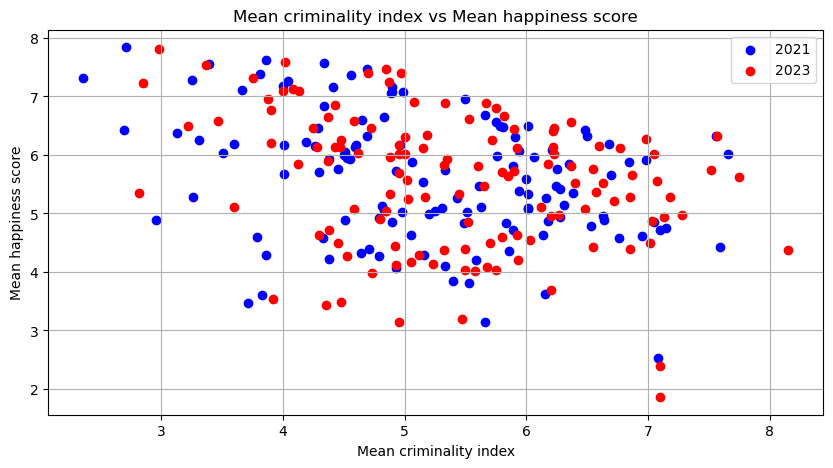

In [35]:
#First plot of the average of the crime index vs the average of the happiness score of both years
crime_index_mean = happy_crime_all_df_clean.groupby('Country name')[['Criminality avg,_2021', 'Ladder score_2021','Criminality avg,_2023','Ladder score_2023']].mean() 
plt.figure(figsize=(10, 5))
plt.scatter(crime_index_mean['Criminality avg,_2021'], crime_index_mean['Ladder score_2021'], label='2021', color='blue')
plt.scatter(crime_index_mean['Criminality avg,_2023'], crime_index_mean['Ladder score_2023'], label='2023', color='red')
plt.title('Mean criminality index vs Mean happiness score')
plt.xlabel('Mean criminality index')
plt.ylabel('Mean happiness score')
plt.grid(True)
plt.legend()
plt.show()

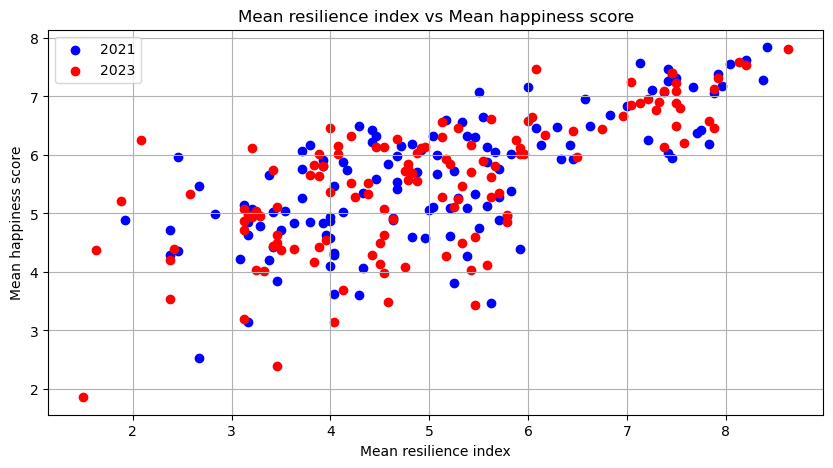

In [37]:
#First plot of the average of the resilience index vs the average of the happiness score of both years
res_index_mean = happy_crime_all_df_clean.groupby('Country name')[['Resilience avg,_2021', 'Ladder score_2021','Resilience avg,_2023','Ladder score_2023']].mean() 
plt.figure(figsize=(10, 5))
plt.scatter(res_index_mean['Resilience avg,_2021'], res_index_mean['Ladder score_2021'], label='2021', color='blue')
plt.scatter(res_index_mean['Resilience avg,_2023'], res_index_mean['Ladder score_2023'], label='2023', color='red')
plt.title('Mean resilience index vs Mean happiness score')
plt.xlabel('Mean resilience index')
plt.ylabel('Mean happiness score')
plt.grid(True)
plt.legend()
plt.show()

In [39]:
#P_value and correlation 
correlation_crime_21, p_value_crime_21 = pearsonr(crime_index_mean['Criminality avg,_2021'], crime_index_mean['Ladder score_2021'])
print("Crime Correlation Coefficient 2021:", correlation_crime_21)
print("Crime P Value 2021:", p_value_crime_21)

Crime Correlation Coefficient 2021: -0.3378762186169857
Crime P Value 2021: 0.00010236711076109493


In [41]:
correlation_crime_23, p_value_crime_23 = pearsonr(crime_index_mean['Criminality avg,_2023'], crime_index_mean['Ladder score_2023'])
print("Crime Correlation Coefficient 2023:", correlation_crime_23)
print("Crime P Value 2023:", p_value_crime_23)

Crime Correlation Coefficient 2023: -0.3115767625236001
Crime P Value 2023: 0.0003628016815266287


In [43]:
correlation_res_21, p_value_res_21 = pearsonr(res_index_mean['Resilience avg,_2021'], res_index_mean['Ladder score_2021'])
print("Resilience Correlation Coefficient 2021:", correlation_res_21)
print("Resilience P Value 2021:", p_value_res_21)

Resilience Correlation Coefficient 2021: 0.7024047623339185
Resilience P Value 2021: 3.5126492551897975e-20


In [45]:
correlation_res_23, p_value_res_23 = pearsonr(res_index_mean['Resilience avg,_2023'], res_index_mean['Ladder score_2023'])
print("Resilience Correlation Coefficient 2023:", correlation_res_23)
print("Resilience P Value 2023:", p_value_res_23)

Resilience Correlation Coefficient 2023: 0.7018474736103196
Resilience P Value 2023: 3.871366020670638e-20


In [47]:
#Combined p_value (Fisher Method)
#Test statistics
z_2021_crime = -2 * np.log(p_value_crime_21)
z_2023_crime = -2 * np.log(p_value_crime_23)

In [49]:
#Sum test statistics
z_combined_crime = z_2021_crime + z_2023_crime
#P_value combined
p_value_combined_crime = np.exp(-z_combined_crime)
print('Combined p_value crime:', p_value_combined_crime)

Combined p_value crime: 1.379302343727515e-15


In [51]:
z_2021_res = -2 * np.log(p_value_res_21)
z_2023_res = -2 * np.log(p_value_res_23)
z_combined_res = z_2021_res + z_2023_res
p_value_combined_res = np.exp(-z_combined_res)
print('Combined p_value resilience:', p_value_combined_res)

Combined p_value resilience: 1.8492602791893733e-78


In [53]:
#Assigned bins to each value in the resilience index, crime index and happiness score of each year 
bins = [1,4,6,8,10]
scoring_threshhold = ['Low (<4)', 'Moderate (4-6)', 'Significant (6-8)', 'High (8-10)']
columns_to_bin = {'Criminality avg,_2021' : 'Threshhold 2021_crime', 'Resilience avg,_2021' : 'Threshhold 2021_res', 'Ladder score_2021' : 'Threshhold 2021_happy',
                  'Criminality avg,_2023' : 'Threshhold 2023_crime', 'Resilience avg,_2023' : 'Threshhold 2023_res', 'Ladder score_2023' : 'Threshhold 2023_happy'}

In [55]:
for col, new_col_name in columns_to_bin.items():
    happy_crime_all_df_clean.loc[:, new_col_name] = pd.cut(happy_crime_all_df_clean[col].copy(), bins=bins, labels=scoring_threshhold, include_lowest=True)
happy_crime_all_df_clean

C:\Users\Santiago\AppData\Local\Temp\ipykernel_3196\3367095099.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  happy_crime_all_df_clean.loc[:, new_col_name] = pd.cut(happy_crime_all_df_clean[col].copy(), bins=bins, labels=scoring_threshhold, include_lowest=True)
C:\Users\Santiago\AppData\Local\Temp\ipykernel_3196\3367095099.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  happy_crime_all_df_clean.loc[:, new_col_name] = pd.cut(happy_crime_all_df_clean[col].copy(), bins=bins, labels=scoring_threshhold,

,Continent,Country name,"Criminality avg,_2021","Resilience avg,_2021",Ladder score_2021,Year_2021,"Criminality avg,_2023","Resilience avg,_2023",Ladder score_2023,Year_2023,row_has_null,Threshhold 2021_crime,Threshhold 2021_res,Threshhold 2021_happy,Threshhold 2023_crime,Threshhold 2023_res,Threshhold 2023_happy
2,Africa,South Africa,6.63,5.79,4.956,2021,7.18,5.63,5.275,2023,False,Significant (6-8),Moderate (4-6),Moderate (4-6),Significant (6-8),Moderate (4-6),Moderate (4-6)
3,Americas,Colombia,7.66,5.83,6.012,2021,7.75,5.63,5.630,2023,False,Significant (6-8),Moderate (4-6),Significant (6-8),Significant (6-8),Moderate (4-6),Moderate (4-6)
4,Americas,Peru,6.35,4.58,5.840,2021,6.40,4.38,5.526,2023,False,Significant (6-8),Moderate (4-6),Moderate (4-6),Significant (6-8),Moderate (4-6),Moderate (4-6)
5,Asia,Iraq,7.05,3.79,4.854,2021,7.13,3.21,4.941,2023,False,Significant (6-8),Low (<4),Moderate (4-6),Significant (6-8),Low (<4),Moderate (4-6)
7,Americas,Venezuela,6.64,1.92,4.892,2021,6.72,1.88,5.211,2023,False,Significant (6-8),Low (<4),Moderate (4-6),Significant (6-8),Low (<4),Moderate (4-6)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,Europe,Slovakia,4.69,5.38,6.331,2021,4.72,5.29,6.469,2023,False,Moderate (4-6),Moderate (4-6),Significant (6-8),Moderate (4-6),Moderate (4-6),Significant (6-8)
172,Europe,Moldova,4.45,3.71,5.766,2021,5.60,3.92,5.819,2023,False,Moderate (4-6),Low (<4),Moderate (4-6),Moderate (4-6),Low (<4),Moderate (4-6)
181,Americas,Uruguay,2.69,7.75,6.431,2021,3.22,7.50,6.494,2023,False,Low (<4),Significant (6-8),Significant (6-8),Low (<4),Significant (6-8),Significant (6-8)
183,Americas,Jamaica,5.91,5.46,6.309,2021,5.80,5.42,5.703,2023,False,Moderate (4-6),Moderate (4-6),Significant (6-8),Moderate (4-6),Moderate (4-6),Moderate (4-6)


In [57]:
#Find the amount of each bin of the crime index in each bin of the happiness score
bar_info_2021 = happy_crime_all_df_clean.groupby(['Threshhold 2021_happy','Threshhold 2021_crime']).size().unstack()

C:\Users\Santiago\AppData\Local\Temp\ipykernel_3196\2218826350.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bar_info_2021 = happy_crime_all_df_clean.groupby(['Threshhold 2021_happy','Threshhold 2021_crime']).size().unstack()


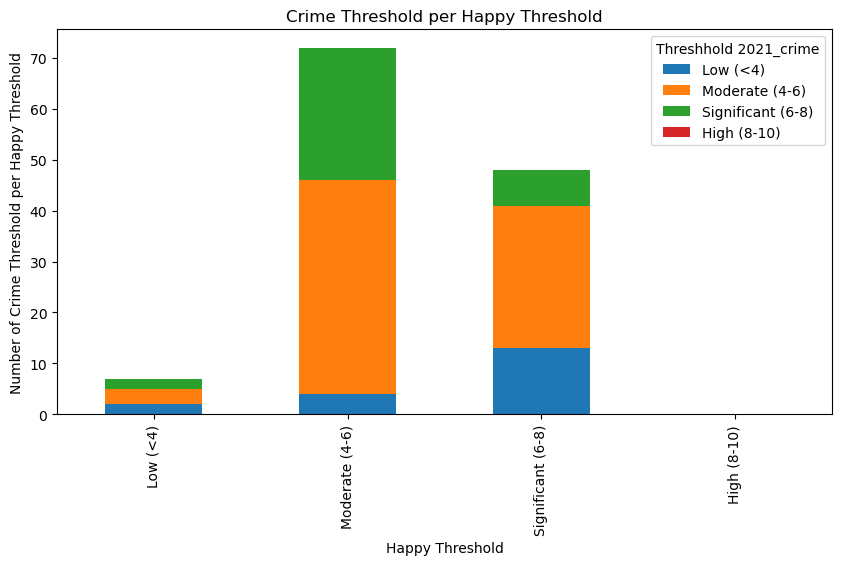

In [59]:
#Plot of the bins of crime index per each bin of the happiness score of the year 2021
bar_info_2021.plot(kind='bar', stacked=True, figsize=(10,5))
plt.title('Crime Threshold per Happy Threshold')
plt.xlabel('Happy Threshold')
plt.ylabel('Number of Crime Threshold per Happy Threshold')
plt.show()

C:\Users\Santiago\AppData\Local\Temp\ipykernel_3196\4020136818.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bar_info_2023 = happy_crime_all_df_clean.groupby(['Threshhold 2023_happy','Threshhold 2023_crime']).size().unstack()


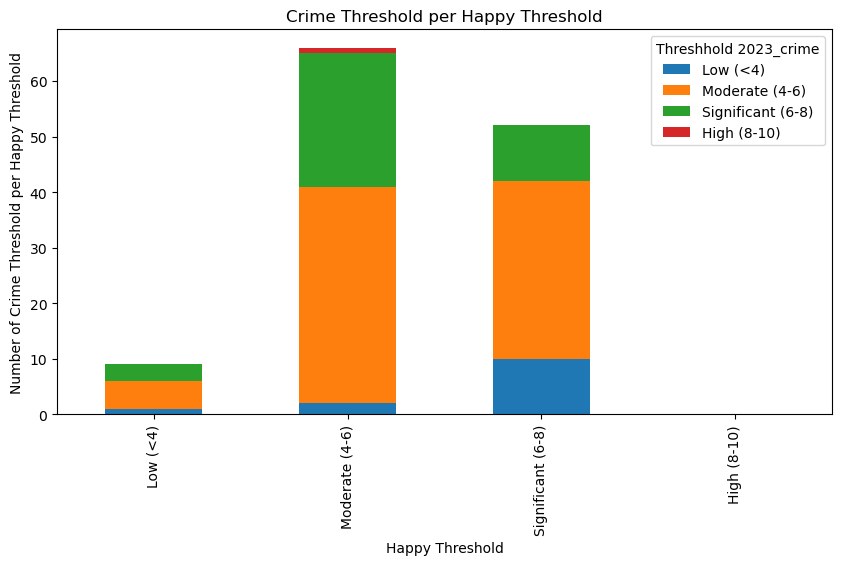

In [61]:
#Plot of the bins of crime index per each bin of the happiness score of the year 2021
bar_info_2023 = happy_crime_all_df_clean.groupby(['Threshhold 2023_happy','Threshhold 2023_crime']).size().unstack()
bar_info_2023.plot(kind='bar', stacked=True, figsize=(10,5))
plt.title('Crime Threshold per Happy Threshold')
plt.xlabel('Happy Threshold')
plt.ylabel('Number of Crime Threshold per Happy Threshold')
plt.show()

In [63]:
#Countries with values asssigned to the bin of High crime index of 2021
high_crime_2021 = happy_crime_all_df_clean[happy_crime_all_df_clean['Criminality avg,_2021'] >=8]
high_crime_2021

,Continent,Country name,"Criminality avg,_2021","Resilience avg,_2021",Ladder score_2021,Year_2021,"Criminality avg,_2023","Resilience avg,_2023",Ladder score_2023,Year_2023,row_has_null,Threshhold 2021_crime,Threshhold 2021_res,Threshhold 2021_happy,Threshhold 2023_crime,Threshhold 2023_res,Threshhold 2023_happy


In [65]:
#Countries with values asssigned to the bin of High crime index of 2021
high_crime_2023 = happy_crime_all_df_clean[happy_crime_all_df_clean['Criminality avg,_2023'] >=8]
high_crime_2023

,Continent,Country name,"Criminality avg,_2021","Resilience avg,_2021",Ladder score_2021,Year_2021,"Criminality avg,_2023","Resilience avg,_2023",Ladder score_2023,Year_2023,row_has_null,Threshhold 2021_crime,Threshhold 2021_res,Threshhold 2021_happy,Threshhold 2023_crime,Threshhold 2023_res,Threshhold 2023_happy
46,Asia,Myanmar,7.59,3.42,4.426,2021,8.15,1.63,4.372,2023,False,Significant (6-8),Low (<4),Moderate (4-6),High (8-10),Low (<4),Moderate (4-6)
